In [ ]:
# install dependencies (can skip this cell if you have already installed the dependencies)
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


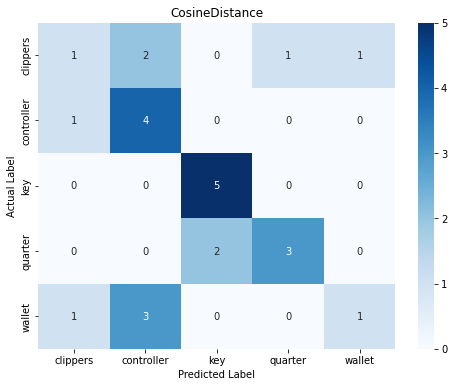

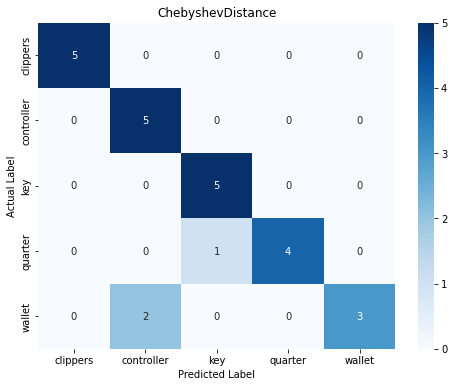

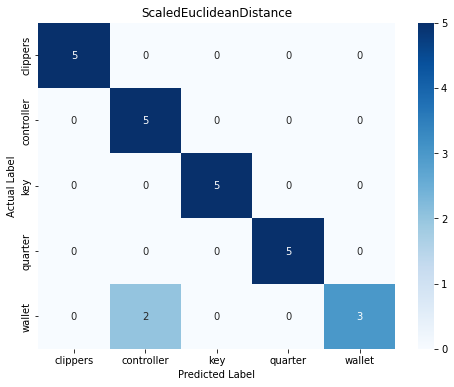

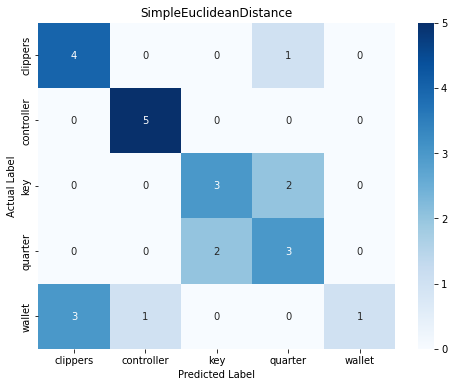

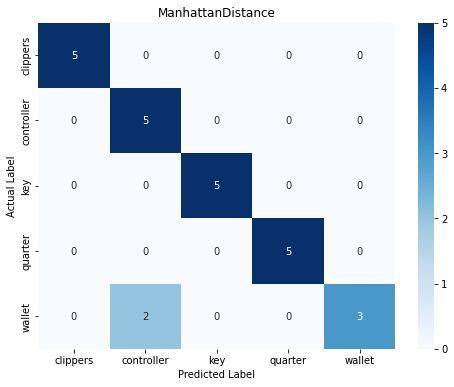

In [ ]:
"""

Adithya Palle
Feb 13 2025
CS 5330 - Project 3 : Real-time 2D Object Recognition

This file is a quick Jupyter Notebook script to help with confusion matrix visualizations for task 7 and 9.
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

PREDICTIONS_FOLDER_PATH = "build/predictions"

for dname in ["14CosineDistance", "17ChebyshevDistance", "23ScaledEuclideanDistance", "23SimpleEuclideanDistance", "17ManhattanDistance", "default"]:
    csv_file = f"{PREDICTIONS_FOLDER_PATH}/{dname}/predictions.csv"  # Update with your actual file path

    # check if the file exists
    try:
        with open(csv_file):
            pass
    except FileNotFoundError:
        print(f"File not found: {csv_file}")
        continue

    df = pd.read_csv(csv_file)

    df["Actual Label"] = df["Image Name"].apply(lambda x: x.split("_")[0])

    classes = sorted(df["Actual Label"].unique())

    cm = confusion_matrix(df["Actual Label"], df["Label"], labels=classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"{dname[2:]}")
    plt.show()